# Exploratory Data Analysis (EDA)

## Emotion Dataset by Sanket Nikam
A dataset consist of tweets labled with corresponding emotions. The dataset used for this project contains text data labeled with one of eight emotions: anger, disgust, fear, joy, neutral, sadness, shame and surprise. The dataset contains a total of 34795 rows.

### Import emotion datasets from github


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/SannketNikam/Emotion-Detection-in-Text/main/data/emotion_dataset_raw.csv'
df = pd.read_csv(url)
print(df.head())

   Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...


### Exploratory Data Analysis (EDA) before performing cleaning and processing



**Import necessary libraries**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import AutoTokenizer
from tqdm import tqdm
import re
import emoji

**Check Datset info**
- check data types, nulls, and total records.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB
None


**Check for missing values**

In [4]:
print(df.isnull().sum())

Emotion    0
Text       0
dtype: int64


View Unique Labels

In [5]:
print("Unique labels:", df['Emotion'].unique())
print("Label counts:\n", df['Emotion'].value_counts())

Unique labels: ['neutral' 'joy' 'sadness' 'fear' 'surprise' 'anger' 'shame' 'disgust']
Label counts:
 Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64


Plot Emotion Distribution

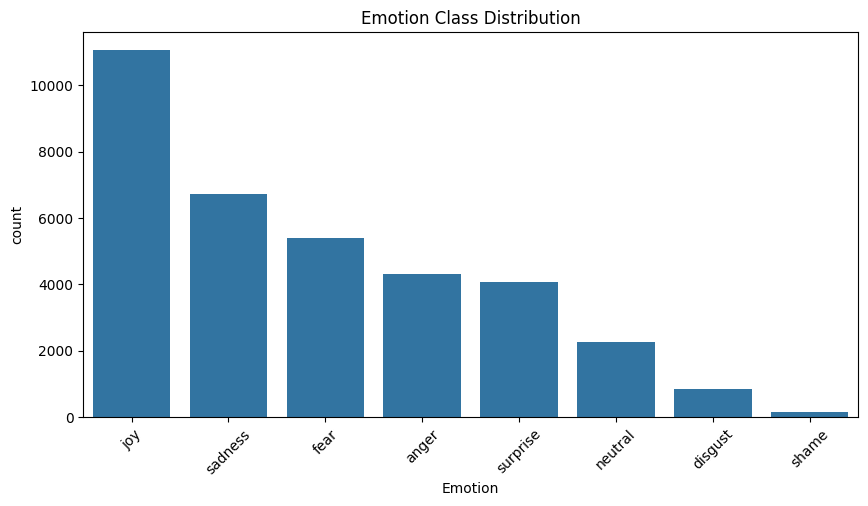

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index)
plt.title("Emotion Class Distribution")
plt.xticks(rotation=45)
plt.show()

Check for Duplicates

In [7]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 3630


Check tweets lengths

count    34792.000000
mean        16.242470
std          9.158303
min          1.000000
25%         10.000000
50%         15.000000
75%         21.000000
max        261.000000
Name: text_length, dtype: float64


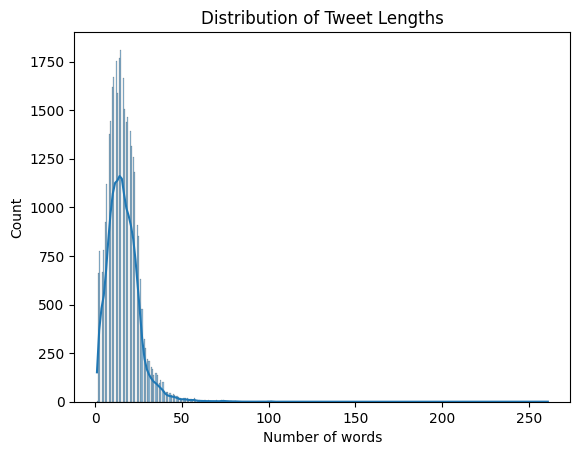

In [8]:
df['text_length'] = df['Text'].apply(lambda x: len(x.split()))

print(df['text_length'].describe())

sns.histplot(df['text_length'], kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of words")
plt.show()

Analyze the number of tokens per tweet using Bertweet tokenizer

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
100%|██████████| 34792/34792 [00:12<00:00, 2787.37it/s]


count    34792.000000
mean        21.029375
std         11.666963
min          1.000000
25%         12.000000
50%         20.000000
75%         28.000000
max        270.000000
Name: token_count, dtype: float64


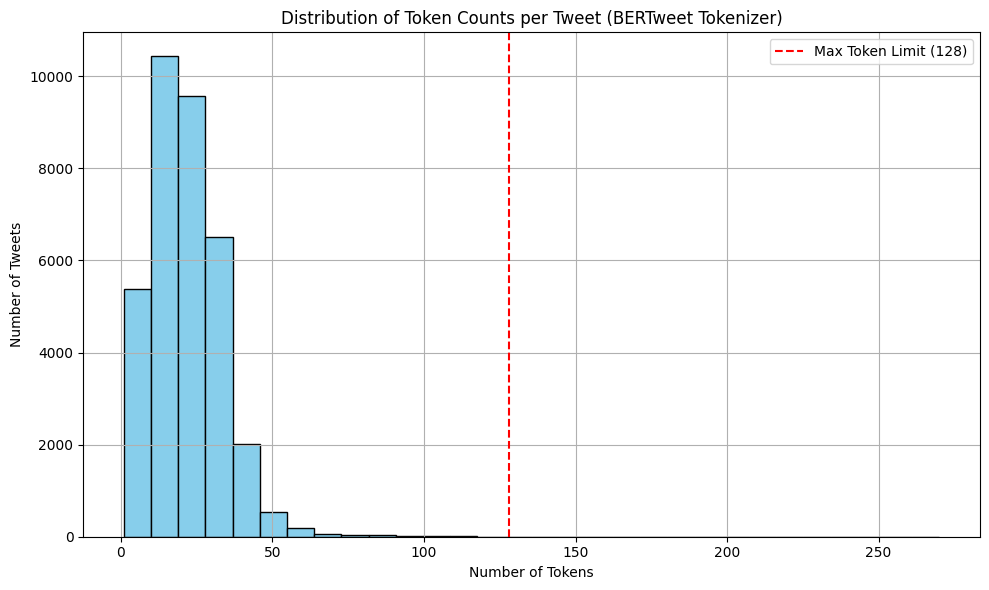

In [9]:
# Load BERTweet tokenizer
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")

# Show progress bar
tqdm.pandas()

# Compute token count per tweet
df['token_count'] = df['Text'].progress_apply(lambda x: len(tokenizer.tokenize(x)))

# Print basic stats
print(df['token_count'].describe())

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['token_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Counts per Tweet (BERTweet Tokenizer)')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.axvline(128, color='red', linestyle='--', label='Max Token Limit (128)')
plt.legend()
plt.tight_layout()
plt.show()

Text Quality Analysis

In [10]:
# Show progress bar
tqdm.pandas()

# URL detection
df['has_url'] = df['Text'].apply(lambda x: bool(re.search(r'http[s]?://', x)))

# Mention detection
df['has_mention'] = df['Text'].apply(lambda x: '@' in x)

# Hashtag detection
df['has_hashtag'] = df['Text'].apply(lambda x: '#' in x)

# Emoji detection
def contains_emoji(s):
    return any(char in emoji.EMOJI_DATA for char in s)

df['has_emoji'] = df['Text'].apply(contains_emoji)

# Show percentages
total = len(df)
print(f"Total tweets: {total}")
print(f"Tweets with URL: {df['has_url'].mean() * 100:.2f}%")
print(f"Tweets with mentions: {df['has_mention'].mean() * 100:.2f}%")
print(f"Tweets with hashtags: {df['has_hashtag'].mean() * 100:.2f}%")
print(f"Tweets with emojis: {df['has_emoji'].mean() * 100:.2f}%")


Total tweets: 34792
Tweets with URL: 0.00%
Tweets with mentions: 15.53%
Tweets with hashtags: 13.66%
Tweets with emojis: 0.38%


Creates a visual word cloud for each emotion.

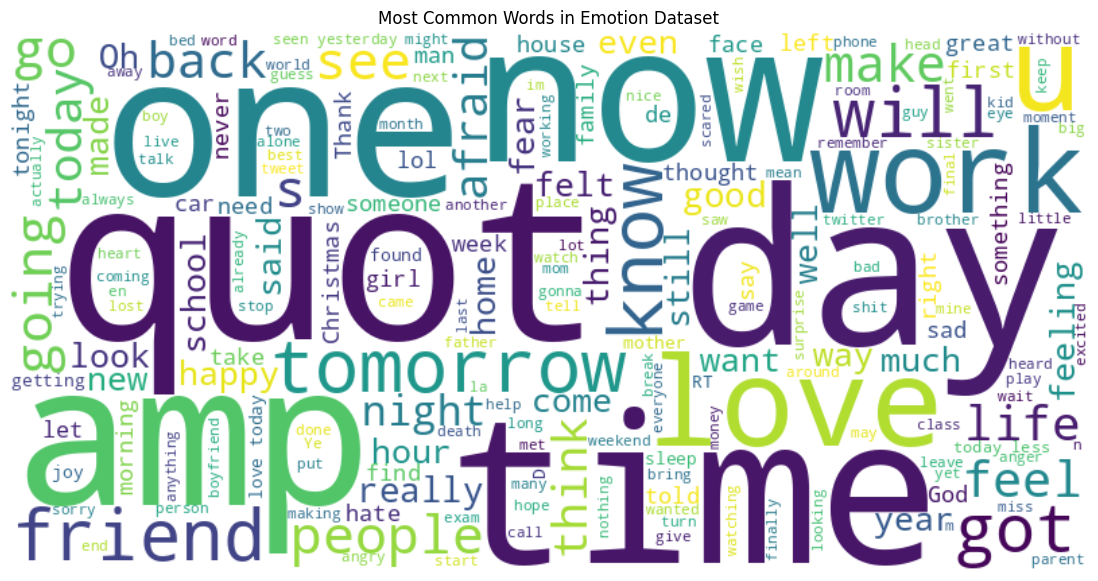

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['Text'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Emotion Dataset")
plt.show()

Generate WordCloud for Each Emotion

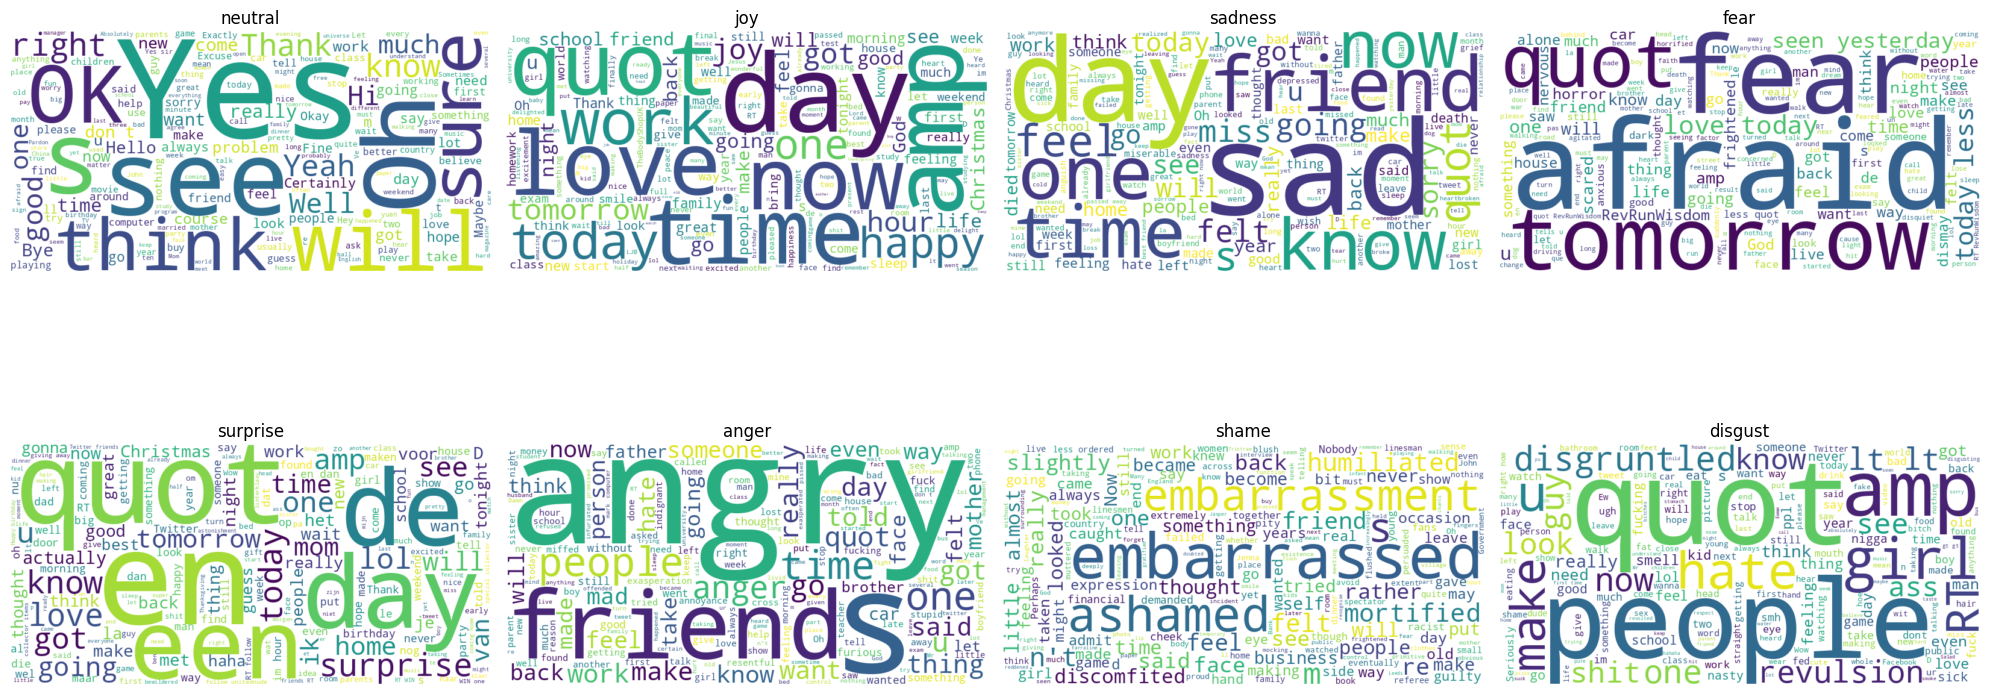

In [12]:
# Get the unique emotions
emotions = df['Emotion'].unique()

# Set up the plot layout
plt.figure(figsize=(20, 10))

# Loop through each emotion
for i, emotion in enumerate(emotions):
    # Filter text for that emotion
    text = " ".join(df[df['Emotion'] == emotion]['Text'].tolist())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot
    plt.subplot(2, (len(emotions)+1)//2, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(emotion)

plt.tight_layout()
plt.show()

**Exploratory Data Analysis Summary**

The emotion dataset consists of 34,795 tweets, each labeled with one of eight emotion categories:
- Anger
- Disgust
- Fear
- Joy
- Neutral
- Sadness
- Shame
- Surprise

Both the tweet text and the emotion labels are stored as strings, and the dataset contains no missing values.

Class Distribution and Imbalance
- The most frequent emotion is Joy, with 11,045 samples.
- The least frequent emotion is Shame, with only 146 samples.
- This indicates a significant class imbalance across the emotion categories.

Duplicate Records
- The dataset contains 3,630 duplicate rows.
- After removing duplicates, the cleaned dataset size will be approximately 31,165 rows (34,795 - 3,630).

Tweet Length Analysis
- Tweet lengths are right-skewed, meaning most tweets are relatively short.
- Key statistics on tweet length:
  - Mean length: approximately 16 words
  - Minimum length : 1 word
  - Maximum length: 261 tokens

Token Length Analysis (After BERTweet Tokenization)
- Average tweet length after tokenization is about 21 tokens.
- Most tweets are well below the 128 token max limit, so truncation should be minimal.
- Maximum token length observed is 270 tokens, indicating some tweets may get truncated if max_length=128 is used.

Tweet Text Characteristics
- Tweets with URLs: 0.00%
- Tweets with mentions (@user): 15.53%
- Tweets with hashtags (#tag): 13.66%
- Tweets with emojis: 0.38%

Word Frequency per Emotion
- Different emotions show distinct frequent words.
- For example, the Neutral category often contains words like “yes,” “see,” and “oh,” reflecting common conversational language in neutral tweets.



## Sarcasm (Irony) Datasets by cardiffnlp on HugginigFace

TweetEval consists of seven heterogenous tasks in Twitter, all framed as multi-class tweet classification. Irony is one of the task included. All tasks have been unified into the same benchmark, with each dataset presented in the same format and with fixed training, validation and test splits.

### Import Datasets From HuggingFace

In [13]:
!pip install --upgrade datasets fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [14]:
from datasets import load_dataset

sarcasm_ds = load_dataset("tweet_eval", "irony")
print(sarcasm_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2862
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 784
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 955
    })
})


Convert to Pandas Dataframe

In [15]:
import pandas as pd

train_df = pd.DataFrame(sarcasm_ds['train'])
val_df = pd.DataFrame(sarcasm_ds['validation'])
test_df = pd.DataFrame(sarcasm_ds['test'])

print(train_df.head())
print(val_df.head())
print(test_df.head())

                                                text  label
0  seeing ppl walking w/ crutches makes me really...      1
1  look for the girl with the broken smile, ask h...      0
2  Now I remember why I buy books online @user #s...      1
3  @user @user So is he banded from wearing the c...      1
4  Just found out there are Etch A Sketch apps.  ...      1
                                                text  label
0  #NBA players #NY support protests of #police k...      1
1  A new year about to start|So many people came ...      0
2  Obama's $1,176,120.90 in Taxpayer Funded Costs...      1
3  Can't wait to work with the dream team again t...      1
4  !!! RT @user Of all the places to get stuck in...      1
                                                text  label
0  @user Can U Help?||More conservatives needed o...      0
1  Just walked in to #Starbucks and asked for a "...      1
2                                     #NOT GONNA WIN      0
3   @user He is exactly that sort of per

### Exploratory Data Analysis (EDA)

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Check basic info

In [17]:
print(train_df.info())
print(val_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2862 non-null   object
 1   label   2862 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    955 non-null    object
 1   label   955 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    784 non-null    object
 1   label   784 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.4+ KB
None


Label distribution (how many sarcastic vs non-sarcastic)

In [18]:
print(train_df['label'].value_counts())

label
1    1445
0    1417
Name: count, dtype: int64


Look for duplicates

In [19]:
print(f"Duplicate texts: {train_df.duplicated('text').sum()}")

Duplicate texts: 0


Check average text length (words and chars)

In [20]:
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['char_count'] = train_df['text'].apply(len)

print(f"Average words per tweet: {train_df['word_count'].mean():.2f}")
print(f"Average chars per tweet: {train_df['char_count'].mean():.2f}")

Average words per tweet: 13.61
Average chars per tweet: 77.89


count    2862.000000
mean       13.605521
std         6.694398
min         1.000000
25%         9.000000
50%        13.000000
75%        18.000000
max       177.000000
Name: text_length, dtype: float64


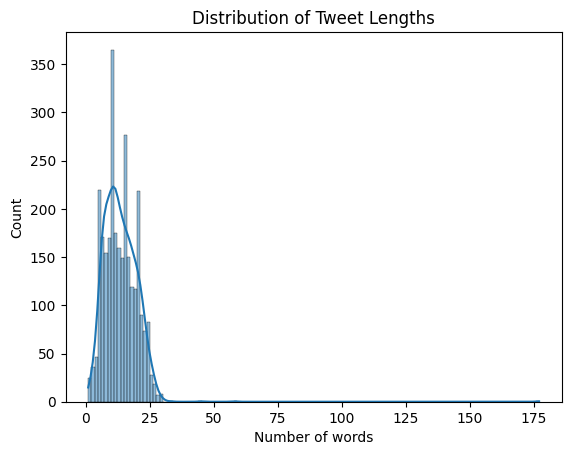

In [21]:
# Add text length (word count)
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))

# Summary stats for text length
print(train_df['text_length'].describe())

# Plot distribution of tweet lengths
sns.histplot(train_df['text_length'], kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of words")
plt.show()

100%|██████████| 2862/2862 [00:01<00:00, 2050.95it/s]


count    2862.000000
mean       19.541230
std         9.788834
min         1.000000
25%        13.000000
50%        19.000000
75%        26.000000
max       278.000000
Name: token_count, dtype: float64


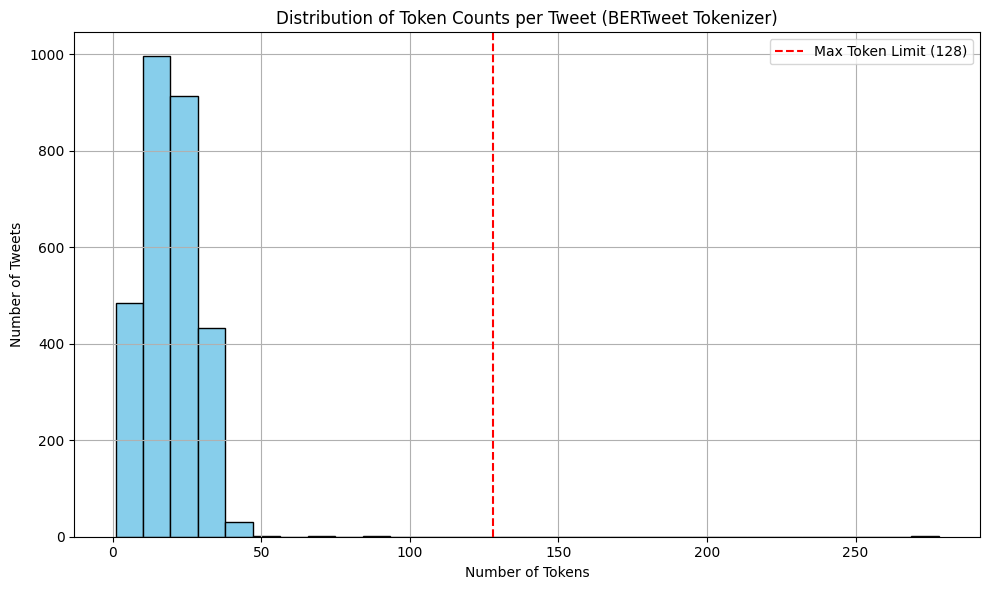

In [22]:
# Load BERTweet tokenizer
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")

# Optional: show progress bar
tqdm.pandas()

# Compute token count per tweet
train_df['token_count'] = train_df['text'].progress_apply(lambda x: len(tokenizer.tokenize(x)))

# Print basic stats
print(train_df['token_count'].describe())

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(train_df['token_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Counts per Tweet (BERTweet Tokenizer)')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.axvline(128, color='red', linestyle='--', label='Max Token Limit (128)')
plt.legend()
plt.tight_layout()
plt.show()

Text Quality Analysis

In [23]:
# Optional: show progress bar
tqdm.pandas()

# URL detection
train_df['has_url'] = train_df['text'].apply(lambda x: bool(re.search(r'http[s]?://', x)))

# Mention detection
train_df['has_mention'] = train_df['text'].apply(lambda x: '@' in x)

# Hashtag detection
train_df['has_hashtag'] = train_df['text'].apply(lambda x: '#' in x)

# Emoji detection
def contains_emoji(s):
    return any(char in emoji.EMOJI_DATA for char in s)

train_df['has_emoji'] = train_df['text'].apply(contains_emoji)

# Show percentages
total = len(train_df)
print(f"Total tweets: {total}")
print(f"Tweets with URL: {train_df['has_url'].mean() * 100:.2f}%")
print(f"Tweets with mentions: {train_df['has_mention'].mean() * 100:.2f}%")
print(f"Tweets with hashtags: {train_df['has_hashtag'].mean() * 100:.2f}%")
print(f"Tweets with emojis: {train_df['has_emoji'].mean() * 100:.2f}%")

Total tweets: 2862
Tweets with URL: 0.80%
Tweets with mentions: 40.78%
Tweets with hashtags: 38.57%
Tweets with emojis: 10.87%


Generate wordcloud

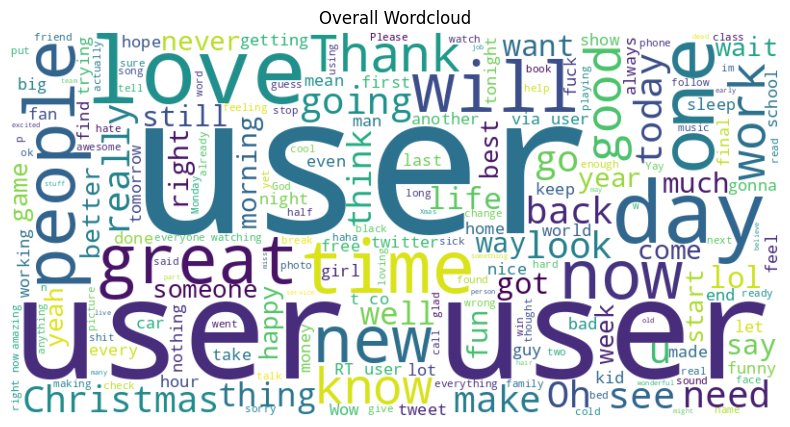

In [24]:
# Combine all texts for overall wordcloud
all_text = " ".join(train_df['text'])

# Generate and show overall wordcloud
wc_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_all, interpolation='bilinear')
plt.axis('off')
plt.title("Overall Wordcloud")
plt.show()

Generate Wordcloud by sarcasm

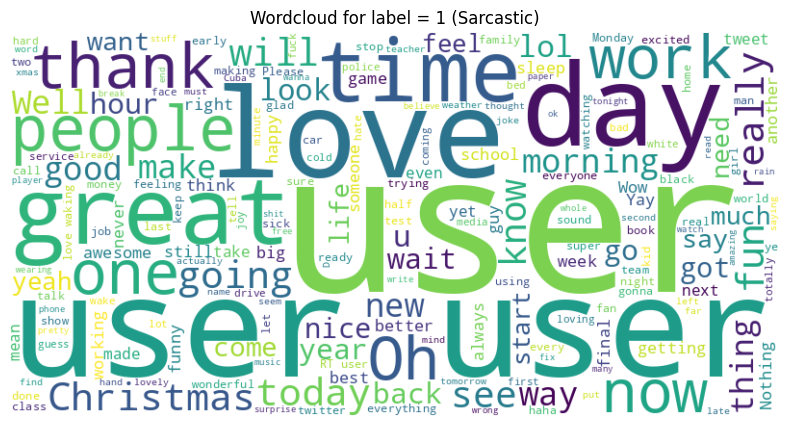

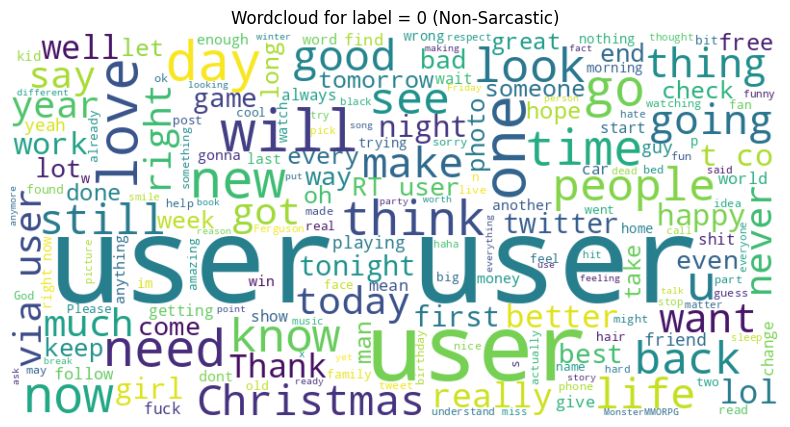

In [25]:
# Wordcloud by sarcasm label (0 = non-sarcastic, 1 = sarcastic)
for label in train_df['label'].unique():
    text = " ".join(train_df[train_df['label'] == label]['text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud for label = {label} ({'Non-Sarcastic' if label==0 else 'Sarcastic'})")
    plt.show()

**Exploratory Data Analysis Summary**
This dataset is part of the TweetEval benchmark, which includes seven heterogeneous tasks related to Twitter NLP. One of the included tasks is irony detection, which is referred to as sarcasm detection in this project.

Dataset Overview
- The dataset is pre-split into:
  - Train
  - Validation
  - Test
- Each split contains two columns:
  - 'text' — the tweet content.
  - 'label' — sarcasm label:
    - 0 = non-sarcastic
    - 1 = sarcastic

Train Split Details
- The train set contains:
  - 1,445 sarcastic tweets (label = 1)
  - 1,417 non-sarcastic tweets (label = 0)
- The class distribution is nearly balanced, making it suitable for model training without heavy resampling.

Data Quality
- There are no missing values.
- There are no duplicate rows.
- No cleaning is required beyond standard NLP preprocessing.

Tweet Length Analysis
- Word counts:
  - Mean: ~103 words
  - Min: 1 word
  - Max: 177 words
- The distribution of tweet lengths is fairly uniform, forming a shape somewhat similar to a bell curve, and not heavily skewed.

Token Length Analysis (After BERTweet Tokenization)
- Average token count: ~19.5 tokens per tweet
- Most tweets are below the 128 token limit (75th percentile ~26 tokens)
- Maximum token length: 278 tokens (some tweets may be truncated if max_length=128)

Tweet Text Characteristics
- Tweets with URLs: 0.80%
- Tweets with mentions (@user): 40.78%
- Tweets with hashtags (#tag): 38.57%
- Tweets with emojis: 10.87%

Vocabulary Notes
- The most frequent word is user, a placeholder used to anonymize usernames.
- This token appears across both sarcastic and non-sarcastic tweets and should be noted for preprocessing, as it may carry minimal semantic value and could bias token frequencies.